<h1><b>Weather classification project</b></h1>

<h3><b>Objective :</b></h3>
 <h5>To predict weather type ,Rainy,Cloudy,Snowy,and Sunny from 11 weather features ,collected from <br>three diffrent locations,during the all seasons .<h5>



<h5><b>Type:</b> Tabular(Multi-classifiation(4 classes))<br>
<b>Target:</b>Weather type (Rainy | Sunny | Cloudy | Snowy)<br>
<b>By:SWA team </b>Shadin Osman | Wajd Alsulaiman |Abdulrahman Gurashi<br>
<b>Monitors :</b>Adam Logman | Asmaa Farouq<br>
<b>AI BootCamp by:</b>(GDSC UofK) | (GDSC AOU) </h5>

<b>EDA Notebook : [eda notebook](https://colab.research.google.com/drive/1t2Dr88E7ypM9EqHMTCnWGZqCJAUScwf7?usp=sharing)

<h1><b>Importing libraries

In [ ]:
import pandas as pd
import numpy as np

#Encoding & Scalling
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.preprocessing import StandardScaler

#Models' libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Validation &mertics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,log_loss

<h1><b>Read the CSV

In [ ]:

# Replace with the actual raw content url
raw_csv_url='https://raw.githubusercontent.com/Shadin-Almubark/Weather-classification/main/weather_classification_data.csv'
# Read the CSV file into a DataFrame
weather_data = pd.read_csv(raw_csv_url)

# Display the first few rows
weather_data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


<h1><b>EDA

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
weather_data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [ ]:
weather_data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [ ]:
weather_data.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

In [ ]:
weather_data.describe(include=['object','category'])

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


<h1><b>Encoding

In [ ]:
#Encoding for features
feature_encoded= pd.get_dummies(weather_data,columns=['Cloud Cover','Season','Location'],dtype=int)

feature_encoded.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,0,0,0,1,0,0,0,1,0,1,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,0,0,0,1,0,1,0,0,0,1,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,1,0,0,0,0,1,0,0,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,1,0,0,0,0,1,0,0,1,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
#Encoding for the target
le = LabelEncoder()
weather_encoded = le.fit_transform(weather_data['Weather Type'])
weather_series=pd.Series(weather_encoded, name='Weather Type')
weather_series.head()

0    1
1    0
2    3
3    3
4    1
Name: Weather Type, dtype: int64

In [ ]:
feature_encoded.drop('Weather Type',axis=1,inplace=True)

In [ ]:
# Concating [features+target]
all_encoded=pd.concat([feature_encoded,weather_series], axis=1)
all_encoded.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain,Weather Type
0,14.0,73,9.5,82.0,1010.82,2,3.5,0,0,0,1,0,0,0,1,0,1,0,1
1,39.0,96,8.5,71.0,1011.43,7,10.0,0,0,0,1,0,1,0,0,0,1,0,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,1,0,0,0,0,1,0,0,0,0,1,3
3,38.0,83,1.5,82.0,1026.25,7,1.0,1,0,0,0,0,1,0,0,1,0,0,3
4,27.0,74,17.0,66.0,990.67,1,2.5,0,0,1,0,0,0,0,1,0,0,1,1


<h1><b>Scalling

In [ ]:
Scale=StandardScaler()
X=feature_encoded

Scaled_data =Scale.fit_transform(X)

Scaled_data_df=pd.DataFrame(Scaled_data ,columns=X.columns)

<h1><b>Feature engineering

In [ ]:
#medain for Visibility, UV Index, Temperature
all_encoded['mean(v, uv, C°)'] = all_encoded[['Visibility (km)', 'UV Index', 'Temperature']].mean(axis=1)


In [ ]:
#mean for Humidity , wind speed
all_encoded['mean(wet+wind)']=all_encoded[['Humidity' , 'Wind Speed']].mean(axis=1)

In [ ]:

# Drop outliers from Atmospheric Pressure column and reassign result
all_encoded = all_encoded.drop(all_encoded[(all_encoded['Atmospheric Pressure'] > 1050) | (all_encoded['Atmospheric Pressure'] < 950)].index, axis= 0)

In [ ]:

#Drop outlier off Temperature
all_encoded=all_encoded.drop(all_encoded[(all_encoded['Temperature'] >70)].index,axis=0)

In [ ]:
#Drop outliers off Wind speed
all_encoded=all_encoded.drop(all_encoded[(all_encoded['Wind Speed'] > 25)].index ,axis=0)

<h1><b>Distrubuting data

In [ ]:

#Data into x,y
x=all_encoded.drop(columns=['Weather Type'])
y =all_encoded['Weather Type']

#x & y into train& test
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size =0.25 , random_state=42)

<h1><b>K-Fold validation

In [ ]:
clf =XGBClassifier()
k_folds =KFold(n_splits = 7)
score =cross_val_score(clf, x, y, cv = k_folds)

print("Average CV score = " ,score.mean())

<h1><b>Metrices

In [ ]:
# def metrices(y_test ,y_pred, y_proba, ):
model=XGBClassifier()
model.fit(x_train,y_train)
precision = precision_score(y_test, model.predict(x_test), average='macro')
recall= recall_score(y_test, model.predict(x_test),average='macro')
accuracy = accuracy_score(y_test, model.predict(x_test))
f1 = f1_score(y_test, model.predict(x_test), average='macro')
auc = roc_auc_score(y_test, model.predict_proba(x_test), average='macro',multi_class='ovo')
log_loss = log_loss(y_test , model.predict_proba(x_test))

  # return precision ,recall ,accuracy ,f1 , auc ,log_loss

#print metrices values

print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('AUC:', auc)
print('Log Loss:', log_loss)

<h1><b>Models

In [ ]:
#XGClassifier
model = XGBClassifier(alpha=0.7)
model.fit(x_train ,y_train)

y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)

In [ ]:
#GradientBoostingClassifier
gra = GradientBoostingClassifier(n_estimators=500, learning_rate=1.0,
max_depth=1)
gra.fit(x_train, y_train)
y_pred = gra.predict(x_test)
accuracy_score(y_pred,y_test)

0.9588994565217391

In [ ]:
#RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.9670516304347826

In [ ]:
#DecisionTreeClassifier"
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_pred,y_test)

0.9616168478260869

<h1><b>Features' importance

<ipython-input-174-67315c706b42>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='copper')


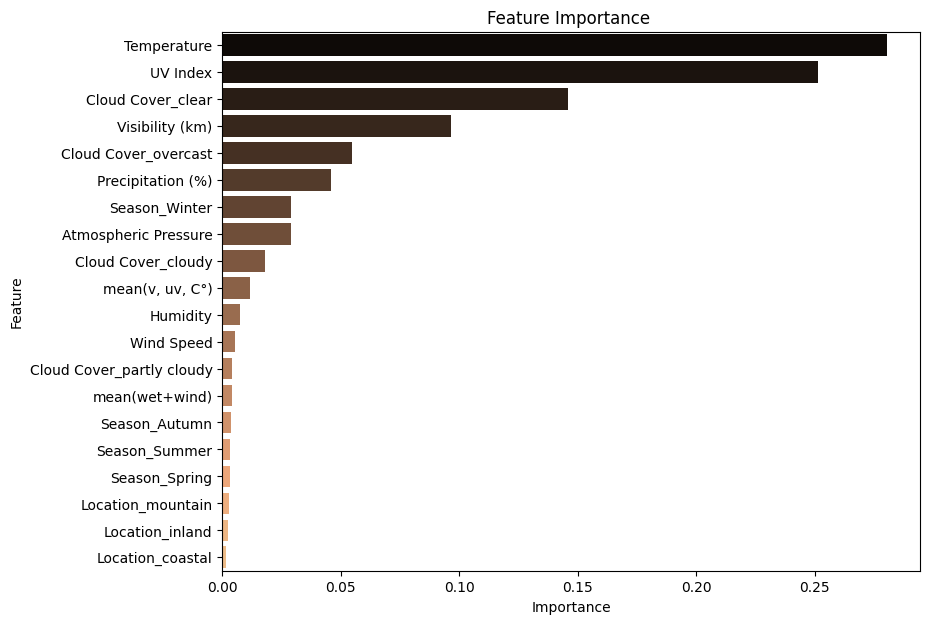

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances = model.feature_importances_
feature_names = x_train.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Now plot using the correct column names
plt.figure(figsize=(9, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='copper')
plt.title('Feature Importance ')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

<h1><b>Metrics Scores</h1>

<h5><b>Best Accuracy: </b>0.9627<br>
<b>Precision:</b> 0.962<br>
<b>Recall:</b>0.962<br>
<b>AUC:</b> 0.998<br>
<b>Log Loss:</b> 0.128<br>
<b>F1 Scores:</b> 0.962<br>
</h5>